# Train classification heads

## Split IEMOCAP dataset

In [1]:
import pandas as pd
import numpy as np
import pickle
import os

from collections import Counter

In [2]:
# Load your dataset from a pickle file
LOCAL_DIR = './data/'

with open(LOCAL_DIR + 'adults.pkl', 'rb') as f:
    adults_df = pickle.load(f)

In [3]:
# Dictionary for mapping to numeric values
emotion_mapping = {"neu": 0, "hap": 1, "sad": 2, "fru": 3, "ang": 4}

# Apply the mapping
adults_df['emotion'] = adults_df['emotion'].map(emotion_mapping)
display(adults_df.dtypes)

filename    object
emotion      int64
gender       int64
path        object
dtype: object

In [4]:
# Directory containing the .npy files
icp_w2v_dir = LOCAL_DIR + 'w2v/icp/xlsr/hs'

# Define the directory for saving the split datasets
icp_input_dir = os.path.join(LOCAL_DIR, "input", "icp") # training_input
os.makedirs(icp_input_dir, exist_ok=True)

In [5]:
icp_features_list = []

# Iterate over each row in the DataFrame to load the corresponding .npy file
for idx, row in adults_df.iterrows():
    filename = row['filename'] + '.npy'
    filepath = os.path.join(icp_w2v_dir, filename)
    if os.path.exists(filepath):
        npy_array = np.load(filepath)
        icp_features_list.append(npy_array)
    else:
        #print(filepath)
        print(f"File {filename} not found in the folder.")
        #icp_features_list.append(np.zeros(6144))  # Append a zero array if file not found

# Convert the list of feature arrays to a DataFrame
icp_features_df = pd.DataFrame(icp_features_list)

# Concatenate the features DataFrame with the original DataFrame
icp_df = pd.concat([adults_df.reset_index(drop=True), icp_features_df.reset_index(drop=True)], axis=1)

In [6]:
# Display the final DataFrame
display(icp_df)

,filename,emotion,gender,path,0,1,2,3,4,5,...,6134,6135,6136,6137,6138,6139,6140,6141,6142,6143
0,Ses01F_impro01_F000,0,1,IEMOCAP/Session1/Ses01F_impro01_F000.wav,-0.030926,0.223613,0.004539,-0.012141,-0.040162,0.028615,...,0.140142,-0.048663,0.109625,0.180168,0.015694,0.193530,0.596324,0.151902,0.011950,-0.022895
1,Ses01F_impro01_F001,0,1,IEMOCAP/Session1/Ses01F_impro01_F001.wav,-0.031812,0.204906,0.004143,-0.014196,-0.042003,0.030573,...,0.157004,-0.073833,0.122185,0.165606,0.041215,0.213260,0.544966,0.163041,0.015471,-0.022097
2,Ses01F_impro01_F002,0,1,IEMOCAP/Session1/Ses01F_impro01_F002.wav,-0.031458,0.205601,0.003306,-0.013400,-0.040757,0.030322,...,0.118511,-0.057894,0.115244,0.253702,0.051045,0.168456,0.563546,0.178928,0.017809,-0.019904
3,Ses01F_impro01_F005,0,1,IEMOCAP/Session1/Ses01F_impro01_F005.wav,-0.032499,0.219379,0.005862,-0.012628,-0.044120,0.028901,...,0.113767,-0.031058,0.128264,0.287593,0.034775,0.162325,0.575815,0.186544,0.013743,-0.014100
4,Ses01F_impro01_F006,3,1,IEMOCAP/Session1/Ses01F_impro01_F006.wav,-0.032060,0.201521,0.003087,-0.013821,-0.040267,0.030766,...,0.104648,-0.059947,0.112682,0.198484,0.013970,0.240851,0.618065,0.170832,0.018158,-0.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22135,Ses05M_script03_2_M043_with_20dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M043_with_2...,-0.033231,0.202084,0.003575,-0.014252,-0.041074,0.030086,...,0.111184,0.030676,0.106418,0.267276,0.010484,0.148852,0.639162,0.181655,0.016621,-0.019668
22136,Ses05M_script03_2_M044_with_10dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M044_with_1...,-0.031252,0.207243,0.002267,-0.013404,-0.039278,0.030176,...,0.071182,-0.087616,0.129326,0.272203,0.009922,0.154349,0.391244,0.042510,0.016891,-0.012919
22137,Ses05M_script03_2_M044_with_20dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M044_with_2...,-0.031526,0.207389,0.002448,-0.013465,-0.039703,0.029862,...,0.120313,-0.014426,0.133942,0.295698,0.010037,0.149852,0.632368,0.178626,0.016258,-0.001496
22138,Ses05M_script03_2_M045_with_10dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M045_with_1...,-0.031700,0.204878,0.002428,-0.013687,-0.039241,0.029718,...,0.076401,-0.038293,0.103616,0.321680,0.010252,0.148374,0.580605,0.221697,0.017045,-0.020321


In [7]:
# Save the adults dataset to a new CSV file
icp_df.to_csv(LOCAL_DIR + 'adults_with_w2v_hs.csv', index=False)

In [8]:
# Function to split dataset based on session
def split_icp_dataset(df):
    train_df = df[df['filename'].str.startswith(('Ses01', 'Ses03', 'Ses05'))]
    val_df = df[df['filename'].str.startswith('Ses02')]
    test_df = df[df['filename'].str.startswith('Ses04')]
    return train_df, val_df, test_df

In [9]:
# Split the dataset
train_df, val_df, test_df = split_icp_dataset(icp_df)
train_df.shape, val_df.shape, test_df.shape

((13560, 6148), (4044, 6148), (4536, 6148))

In [10]:
train_df

,filename,emotion,gender,path,0,1,2,3,4,5,...,6134,6135,6136,6137,6138,6139,6140,6141,6142,6143
0,Ses01F_impro01_F000,0,1,IEMOCAP/Session1/Ses01F_impro01_F000.wav,-0.030926,0.223613,0.004539,-0.012141,-0.040162,0.028615,...,0.140142,-0.048663,0.109625,0.180168,0.015694,0.193530,0.596324,0.151902,0.011950,-0.022895
1,Ses01F_impro01_F001,0,1,IEMOCAP/Session1/Ses01F_impro01_F001.wav,-0.031812,0.204906,0.004143,-0.014196,-0.042003,0.030573,...,0.157004,-0.073833,0.122185,0.165606,0.041215,0.213260,0.544966,0.163041,0.015471,-0.022097
2,Ses01F_impro01_F002,0,1,IEMOCAP/Session1/Ses01F_impro01_F002.wav,-0.031458,0.205601,0.003306,-0.013400,-0.040757,0.030322,...,0.118511,-0.057894,0.115244,0.253702,0.051045,0.168456,0.563546,0.178928,0.017809,-0.019904
3,Ses01F_impro01_F005,0,1,IEMOCAP/Session1/Ses01F_impro01_F005.wav,-0.032499,0.219379,0.005862,-0.012628,-0.044120,0.028901,...,0.113767,-0.031058,0.128264,0.287593,0.034775,0.162325,0.575815,0.186544,0.013743,-0.014100
4,Ses01F_impro01_F006,3,1,IEMOCAP/Session1/Ses01F_impro01_F006.wav,-0.032060,0.201521,0.003087,-0.013821,-0.040267,0.030766,...,0.104648,-0.059947,0.112682,0.198484,0.013970,0.240851,0.618065,0.170832,0.018158,-0.021889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22135,Ses05M_script03_2_M043_with_20dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M043_with_2...,-0.033231,0.202084,0.003575,-0.014252,-0.041074,0.030086,...,0.111184,0.030676,0.106418,0.267276,0.010484,0.148852,0.639162,0.181655,0.016621,-0.019668
22136,Ses05M_script03_2_M044_with_10dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M044_with_1...,-0.031252,0.207243,0.002267,-0.013404,-0.039278,0.030176,...,0.071182,-0.087616,0.129326,0.272203,0.009922,0.154349,0.391244,0.042510,0.016891,-0.012919
22137,Ses05M_script03_2_M044_with_20dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M044_with_2...,-0.031526,0.207389,0.002448,-0.013465,-0.039703,0.029862,...,0.120313,-0.014426,0.133942,0.295698,0.010037,0.149852,0.632368,0.178626,0.016258,-0.001496
22138,Ses05M_script03_2_M045_with_10dB_noise,4,0,IEMOCAP/Session5/Ses05M_script03_2_M045_with_1...,-0.031700,0.204878,0.002428,-0.013687,-0.039241,0.029718,...,0.076401,-0.038293,0.103616,0.321680,0.010252,0.148374,0.580605,0.221697,0.017045,-0.020321


In [11]:
def balanced_sample_maker(X, y, random_seed=42):
    '''
    Take N samples from each class, where N is the number of samples in the smallest class.
    :param X: X_train
    :param y: y_train
    :param random_seed: seed for reproducibility
    :return: resampled dataset
    '''
    # Convert labels to tuples for compatibility with np.unique
    y_tuples = [tuple(val) for val in y.values]
    uniq_levels = np.unique(y_tuples, axis=0)

    # Debugging: Print unique levels
    print("Unique levels found:", uniq_levels)
    
    if random_seed is not None:
        np.random.seed(random_seed)

    # Find observation indices of each class level
    groupby_levels = {}
    # Take sample size based on the class with the smallest number of samples
    sample_size = np.inf
    for level in uniq_levels:
        obs_idx = [idx for idx, val in enumerate(y_tuples) if val == tuple(level)]
        groupby_levels[tuple(level)] = obs_idx
        if len(obs_idx) < sample_size:
            sample_size = len(obs_idx)
    
    # Debugging: Print groupby_levels and sample_size
    #print("Group by levels:", groupby_levels)
    print("Sample size determined:", sample_size)

    # If no sample size is found, return empty
    if sample_size == np.inf:
        print("No valid samples found for balancing.")
        return pd.DataFrame(), pd.DataFrame()

    # Downsampling observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in groupby_levels.items():
        down_sample_idx = np.random.choice(gb_idx, size=sample_size, replace=False).tolist()
        balanced_copy_idx += down_sample_idx
    np.random.shuffle(balanced_copy_idx)

    data_train = X.iloc[balanced_copy_idx]
    labels_train = y.iloc[balanced_copy_idx]
    
    if len(data_train) == (sample_size * len(uniq_levels)):
        print('Number of samples: ', sample_size * len(uniq_levels), 'Number of samples per class: ', \
              sample_size, ' #classes: ', len(list(set([tuple(x) for x in uniq_levels]))))
    else:
        print('Number of samples is wrong!')

    # Debugging: Print the shape and content of labels_train
    print("Shape of labels_train:", labels_train.shape)
    #print("Content of labels_train:", labels_train)
    
    if labels_train.empty:
        print('No labels found after balancing!')
        return data_train, labels_train

    labels, values = zip(*Counter(map(tuple, labels_train.values)).items())
    check = all(x == values[0] for x in values)
    if check:
        print('Good, all classes have the same number of examples')
    else:
        print('Repeat again your sampling, your classes are not balanced')
    
    return data_train, labels_train


# Define the process_and_balance_dataset function
def process_and_balance_dataset(df, feature_cols, label_cols, groupby_cols):
    # Extract the features (X) and labels (y) for balancing
    X = df[feature_cols]
    y = df[label_cols]

    # Debugging: Print the y dataframe
    #print("y dataframe:")
    #print(y)
    
    # Balance the dataset
    balanced_X, balanced_y = balanced_sample_maker(X, y, random_seed=42)

    # Combine balanced features and labels
    balanced_df = pd.concat([balanced_X, balanced_y], axis=1)
    
    return balanced_df

In [12]:
# Process and balance the adults train dataset
icp_train_balanced_df = process_and_balance_dataset(
    train_df, 
    feature_cols=[col for col in train_df.columns if col not in ['gender', 'emotion']], 
    label_cols=['emotion', 'gender'], 
    groupby_cols=['gender', 'emotion']
)

# Check the distribution
print(icp_train_balanced_df.groupby(['gender', 'emotion']).size())

Unique levels found: [[0 0]
 [0 1]
 [1 0]
 [1 1]
 [2 0]
 [2 1]
 [3 0]
 [3 1]
 [4 0]
 [4 1]]
Sample size determined: 789
Number of samples:  7890 Number of samples per class:  789  #classes:  10
Shape of labels_train: (7890, 2)
Good, all classes have the same number of examples
gender  emotion
0       0          789
        1          789
        2          789
        3          789
        4          789
1       0          789
        1          789
        2          789
        3          789
        4          789
dtype: int64


In [13]:
icp_train_balanced_df.shape

(7890, 6148)

In [14]:
# Extract features and labels for each set
# Prepare X and Y sets
icp_X_train = icp_train_balanced_df.drop(columns=['filename', 'path', 'emotion', 'gender'])
icp_y_train = icp_train_balanced_df['emotion']

icp_X_val = val_df.drop(columns=['filename', 'path', 'emotion', 'gender'])
icp_y_val = val_df['emotion']

icp_X_test = test_df.drop(columns=['filename', 'path', 'emotion', 'gender'])
icp_y_test = test_df['emotion']

In [15]:
# Save the numpy arrays
np.save(os.path.join(icp_input_dir, 'icp_X_train.npy'), icp_X_train)
np.save(os.path.join(icp_input_dir, 'icp_y_train.npy'), icp_y_train)
np.save(os.path.join(icp_input_dir, 'icp_X_val.npy'), icp_X_val)
np.save(os.path.join(icp_input_dir, 'icp_y_val.npy'), icp_y_val)
np.save(os.path.join(icp_input_dir, 'icp_X_test.npy'), icp_X_test)
np.save(os.path.join(icp_input_dir, 'icp_y_test.npy'), icp_y_test)

print("Datasets saved successfully in:", icp_input_dir)

Datasets saved successfully in: ./data/input/icp


## Load AIBO dataset

In [15]:
# Load your dataset from a pickle file
with open(LOCAL_DIR + 'children.pkl', 'rb') as f:
    children_df = pickle.load(f)

# Extract school information from filename
children_df['school'] = children_df['filename'].apply(lambda x: 0 if x.startswith('Mont') else 1 if x.startswith('Ohm') else 'Unknown')
children_df.shape

(18216, 4)

In [16]:
# Directory containing the .npy files
aibo_w2v_dir = LOCAL_DIR + 'w2v/aibo/xlsr/hs'

# Define the directory for saving the split datasets
aibo_input_dir = os.path.join(LOCAL_DIR, "input", "aibo") # testing_input
os.makedirs(aibo_input_dir, exist_ok=True)

In [17]:
aibo_features_list = []

# Iterate over each row in the DataFrame to load the corresponding .npy file
for idx, row in children_df.iterrows():
    filename = row['filename'] + '.npy'
    filepath = os.path.join(aibo_w2v_dir, filename)
    if os.path.exists(filepath):
        npy_array = np.load(filepath)
        aibo_features_list.append(npy_array)
    else:
        print(f"File {filename} not found in the folder.")

# Convert the list of feature arrays to a DataFrame
aibo_features_df = pd.DataFrame(aibo_features_list)

# Concatenate the features DataFrame with the original DataFrame
aibo_df = pd.concat([children_df.reset_index(drop=True), 
                     aibo_features_df.reset_index(drop=True)], 
                    axis=1)

In [18]:
aibo_df.shape

(18216, 6148)

In [19]:
aibo_df.isna().sum()

filename    0
emotion     0
path        0
school      0
0           0
           ..
6139        0
6140        0
6141        0
6142        0
6143        0
Length: 6148, dtype: int64

In [20]:
#aibo_df = aibo_df.dropna()

In [21]:
display(aibo_df)

,filename,emotion,path,school,0,1,2,3,4,5,...,6134,6135,6136,6137,6138,6139,6140,6141,6142,6143
0,Mont_01_000_00,0,AIBO/wav/Mont_01_000_00.wav,0,-0.038469,0.215683,0.008839,-0.013932,-0.054621,0.028395,...,0.145823,-0.008422,0.106062,0.286037,0.102529,0.154712,0.515403,0.181546,0.007542,-0.021756
1,Mont_01_001_00,0,AIBO/wav/Mont_01_001_00.wav,0,-0.032102,0.216030,0.002579,-0.013839,-0.040434,0.030354,...,0.037408,-0.087516,0.109556,0.034285,0.009158,0.158525,-0.134196,-0.085020,0.014643,-0.023316
2,Mont_01_001_01,0,AIBO/wav/Mont_01_001_01.wav,0,-0.032746,0.209516,0.005693,-0.013601,-0.044610,0.029207,...,0.065500,-0.077061,0.107276,0.254958,0.010772,0.170826,0.476344,0.123881,0.014074,-0.023066
3,Mont_01_004_00,0,AIBO/wav/Mont_01_004_00.wav,0,-0.037350,0.203648,0.006905,-0.014801,-0.053595,0.031613,...,0.171855,0.017513,0.122052,0.239248,0.131776,0.158067,0.549241,0.209193,0.015673,-0.023112
4,Mont_01_005_00,0,AIBO/wav/Mont_01_005_00.wav,0,-0.032742,0.214220,0.005624,-0.013298,-0.047395,0.029747,...,0.105107,-0.086828,0.104000,0.180310,0.081143,0.147773,0.394498,0.053812,0.012835,-0.023164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18211,Ohm_32_317_01,0,AIBO/wav/Ohm_32_317_01.wav,1,-0.034585,0.204776,0.004760,-0.013674,-0.044353,0.030435,...,0.108511,-0.013941,0.107442,0.231017,0.123885,0.162654,0.590634,0.216468,0.016275,-0.022043
18212,Ohm_32_318_00,3,AIBO/wav/Ohm_32_318_00.wav,1,-0.034552,0.195100,0.004425,-0.014725,-0.046347,0.031897,...,0.116971,-0.060135,0.121098,0.208981,0.047891,0.168528,0.569325,0.184187,0.016685,-0.023449
18213,Ohm_32_319_00,3,AIBO/wav/Ohm_32_319_00.wav,1,-0.034710,0.197635,0.004499,-0.014956,-0.045275,0.032517,...,0.144750,-0.016250,0.108798,0.297442,0.119505,0.155797,0.554778,0.167345,0.016069,-0.018577
18214,Ohm_32_320_00,0,AIBO/wav/Ohm_32_320_00.wav,1,-0.035568,0.227074,0.007452,-0.011991,-0.049995,0.028143,...,0.129495,-0.002454,0.109137,0.351195,0.139207,0.155710,0.567816,0.203946,0.010112,-0.018062


In [22]:
# Save the balanced adults dataset to a new CSV file
aibo_df.to_csv(LOCAL_DIR + 'children_with_w2v_hs.csv', index=False)

In [23]:
aibo_X_test = aibo_df.drop(columns=['filename', 'path', 'school', 'emotion'])
aibo_y_test = aibo_df['emotion']
aibo_X_test.shape, aibo_y_test.shape

((18216, 6144), (18216,))

In [25]:
np.save(os.path.join(aibo_input_dir, 'aibo_X_test.npy'), aibo_X_test)
np.save(os.path.join(aibo_input_dir, 'aibo_y_test.npy'), aibo_y_test)

print("Datasets saved successfully in:", aibo_input_dir)

Datasets saved successfully in: ./data/input/aibo


## Run training on IEMOCAP

### Train with MLP

In [24]:
import logging
import torch as t
import torch.nn.functional as F

from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from tqdm.autonotebook import tqdm
from time import gmtime, strftime, time
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

/tmp/ipykernel_143/3089368445.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [25]:
class one_layer_MLP(nn.Module):
    def __init__(self, in_dim):
        super(one_layer_MLP, self).__init__()
        self.layers = nn.Sequential(
            #nn.Linear(3072, 1500),     # with ft/
            nn.Linear(in_dim, 1500),      # with hs/
            nn.ELU(),
            nn.Linear(1500, 500),
            nn.Dropout(0.2),
            nn.Linear(500, 5)         # output size should match number of classes
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x


class three_layer_MLP(nn.Module):
    def __init__(self, in_dim, hidden_dim_1, hidden_dim_2, out_dim=5):
        super(three_layer_MLP, self).__init__()

        self.in_dim = in_dim
        self.hidden_dim_1 = hidden_dim_1
        self.hidden_dim_2 = hidden_dim_2
        self.out_dim = out_dim

        ## 1st hidden layer
        self.linear_1 = nn.Linear(self.in_dim, self.hidden_dim_1)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()
        self.linear_1_bn = nn.BatchNorm1d(self.hidden_dim_1, momentum=0.6)

        ## 2nd hidden layer
        self.linear_2 = nn.Linear(self.hidden_dim_1, self.hidden_dim_2)
        self.linear_2.weight.detach().normal_(0.0, 0.1)
        self.linear_2.bias.detach().zero_()
        self.linear_2_bn = nn.BatchNorm1d(self.hidden_dim_2, momentum=0.6)

        ## Out layer
        self.linear_out = nn.Linear(self.hidden_dim_2, self.out_dim)
        self.linear_out.weight.detach().normal_(0.0, 0.1)
        self.linear_out.bias.detach().zero_()

    def forward(self, x):
        out = self.linear_1(x)
        out = self.linear_1_bn(out)
        out = F.relu(out)

        out = self.linear_2(out)
        out = self.linear_2_bn(out)
        out = F.relu(out)
        out = F.dropout(out, p=0.175, training=self.training)

        out = self.linear_out(out)
        return out

In [26]:
BATCH_SIZE = 64  # try 32
EPOCHS = 100

In [27]:
# Convert the numpy arrays to torch tensors
icp_X_train_tensor = t.from_numpy(icp_X_train.values).float()
icp_y_train_tensor = t.from_numpy(icp_y_train.values).long()
icp_X_val_tensor = t.from_numpy(icp_X_val.values).float()
icp_y_val_tensor = t.from_numpy(icp_y_val.values).long()

# Create TensorDataset
train_dataset = TensorDataset(icp_X_train_tensor, icp_y_train_tensor)
val_dataset = TensorDataset(icp_X_val_tensor, icp_y_val_tensor)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)

In [28]:
import torch as t
from torch.utils.data import DataLoader, TensorDataset


# Define the normalization function
def normalize(tensor, min_vals, max_vals):
    '''
    min_vals/max_vals are 1-D arrays with 128 values for mspectr
    :return: Normalized tensor per 1 filter band
    '''
    #tensor = tensor.permute(0, 2, 1)
    tensor_norm = (tensor - min_vals) / (max_vals - min_vals)
    #tensor_norm = tensor_norm.permute(0, 2, 1)
    return tensor_norm

# Convert the numpy arrays to torch tensors
icp_X_train_tensor = t.from_numpy(icp_X_train.values).float()
icp_y_train_tensor = t.from_numpy(icp_y_train.values).long()
icp_X_val_tensor = t.from_numpy(icp_X_val.values).float()
icp_y_val_tensor = t.from_numpy(icp_y_val.values).long()
icp_X_test_tensor = t.from_numpy(icp_X_test.values).float()
icp_y_test_tensor = t.from_numpy(icp_y_test.values).long()
aibo_X_test_tensor = t.from_numpy(aibo_X_test.values).float()
aibo_y_test_tensor = t.from_numpy(aibo_y_test.values).long()

# Compute min and max values for each feature from the training dataset
min_vals = icp_X_train_tensor.min(dim=0, keepdim=True)[0]
max_vals = icp_X_train_tensor.max(dim=0, keepdim=True)[0]

# Normalize the tensors
icp_X_train_tensor = normalize(icp_X_train_tensor, min_vals, max_vals)
icp_X_val_tensor = normalize(icp_X_val_tensor, min_vals, max_vals)
icp_X_test_tensor = normalize(icp_X_test_tensor, min_vals, max_vals)
aibo_X_test_tensor = normalize(aibo_X_test_tensor, min_vals, max_vals)

# Create TensorDataset
train_dataset = TensorDataset(icp_X_train_tensor, icp_y_train_tensor)
val_dataset = TensorDataset(icp_X_val_tensor, icp_y_val_tensor)
icp_test_dataset = TensorDataset(icp_X_test_tensor, icp_y_test_tensor)
aibo_test_dataset = TensorDataset(aibo_X_test_tensor, aibo_y_test_tensor)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
icp_test_loader = DataLoader(dataset=icp_test_dataset, batch_size=BATCH_SIZE, shuffle=False)
aibo_test_loader = DataLoader(dataset=aibo_test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [29]:
def get_device():
    return "cuda" if t.cuda.is_available() else "cpu"

def get_datetime():
    return strftime("%Y-%m-%d", gmtime())

In [30]:
device = get_device()

In [31]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model, model_name, dataset):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, model_name, dataset)
        elif score < self.best_score + self.delta:
            self.counter += 1
            logging.info(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                logging.info("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model, model_name, dataset)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, model_name, dataset):
        """Saves model when validation loss decreases."""
        checkpoint_dir = './checkpoints'
        os.makedirs(checkpoint_dir, exist_ok=True)
        checkpoint_path = os.path.join(checkpoint_dir, f'{model_name}_{dataset}_checkpoint_{get_datetime()}.ckp')
        if self.verbose:
            logging.info(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        t.save({'state_dict': model.state_dict()}, checkpoint_path)
        self.val_loss_min = val_loss

In [32]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s')

class Trainer:
    def __init__(self, model, model_name, dataset, crit, optim=None, train_dl=None, val_test_dl=None, test_dl=None, cuda=True, early_stopping_patience=-1):
        self._model = model
        self.model_name = model_name
        self.dataset = dataset
        self._crit = crit
        self._optim = optim
        self._train_dl = train_dl
        self._val_test_dl = val_test_dl
        self._test_dl = test_dl
        self._cuda = cuda
        self.device = get_device() if cuda else "cpu"
        self._early_stopping_patience = early_stopping_patience

        self._model.to(self.device)
        self._crit.to(self.device)

    def restore_checkpoint(self):
        checkpoint_path = os.path.join('checkpoints', f'{self.model_name}_checkpoint_{get_datetime()}.ckp')
        if os.path.exists(checkpoint_path):
            checkpoint = t.load(checkpoint_path, map_location=self.device)
            self._model.load_state_dict(checkpoint['state_dict'])
            logging.info(f'Checkpoint loaded from {checkpoint_path}')

    def save_onnx(self, filename):
        self._model.cpu().eval()
        x = t.randn(1, 3, 300, 300, requires_grad=True)
        t.onnx.export(self._model, x, filename, export_params=True, opset_version=10, do_constant_folding=True,
                      input_names=['input'], output_names=['output'], dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})
        self._model.to(self.device)
        logging.info(f"Model saved to ONNX format at {filename}")

    def train_step(self, x, y):
        self._optim.zero_grad()
        output = self._model(x)
        loss = self._crit(output, y)
        loss.backward()
        self._optim.step()
        return loss.item(), output

    def val_test_step(self, x, y):
        output = self._model(x)
        loss = self._crit(output, y)
        return loss.item(), output

    def train_epoch(self):
        self._model.train()
        total_loss = 0
        for x, y in self._train_dl:
            x, y = x.to(self.device), y.to(self.device)
            loss, _ = self.train_step(x, y)
            total_loss += loss
        avg_loss = total_loss / len(self._train_dl)
        logging.info(f"Train: loss: {avg_loss:.4f}")
        return avg_loss

    def val_test(self, mode=False):
        self._model.eval()
        total_loss = 0
        all_preds = []
        data_loader = self._test_dl if mode else self._val_test_dl

        with t.no_grad():
            for x, y in data_loader:
                x, y = x.to(self.device), y.to(self.device)
                loss, pred = self.val_test_step(x, y)
                total_loss += loss
                pred = pred.cpu().numpy()
                all_preds.extend(pred)

        avg_loss = total_loss / len(data_loader)
        logging.info(f"{'Test' if mode else 'Validation'}: loss: {avg_loss:.4f}")
        return avg_loss, np.array(all_preds)

    def fit(self, n_epochs):
        self.restore_checkpoint()
        early_stopping = EarlyStopping(patience=self._early_stopping_patience, verbose=True)

        avg_train_losses = []
        avg_valid_losses = []

        for epoch in range(1, n_epochs + 1):
            logging.info(f"Epoch {epoch}/{n_epochs}")
            train_loss = self.train_epoch()
            valid_loss = self.val_test(mode=False)[0]

            avg_train_losses.append(train_loss)
            avg_valid_losses.append(valid_loss)

            early_stopping(valid_loss, self._model, self.model_name, self.dataset)
            if early_stopping.early_stop:
                logging.info("Early stopping")
                break

        return avg_train_losses, avg_valid_losses

    def test(self):
        self.restore_checkpoint()
        test_loss, all_preds = self.val_test(mode=True)
        
        # output recall and f1
        all_preds_classes = np.argmax(all_preds, axis=1)
        y_true = np.concatenate([y.cpu().numpy() for _, y in self._test_dl])
        
        accuracy = accuracy_score(y_true, all_preds_classes)
        f1 = f1_score(y_true, all_preds_classes, average='macro')
        recall = recall_score(y_true, all_preds_classes, average='macro')
        return test_loss, all_preds_classes, accuracy, f1, recall

### Train with 3-layer MLP

In [33]:
model = three_layer_MLP(6144, 3000, 1000, 5)
print(model)

three_layer_MLP(
  (linear_1): Linear(in_features=6144, out_features=3000, bias=True)
  (linear_1_bn): BatchNorm1d(3000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=3000, out_features=1000, bias=True)
  (linear_2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_out): Linear(in_features=1000, out_features=5, bias=True)
)


We'll be using class weight in the loss function.

In [34]:
# Compute class weights
y_train_np = icp_y_train_tensor.numpy()
class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(y_train_np), 
                                     y=y_train_np)
class_weights_tensor = t.tensor(class_weights, dtype=t.float)
optimizer = Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor, reduction='mean')

In [35]:
trainer = Trainer(
    model, 
    "w2v", 
    "icp", 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    icp_test_loader,
    cuda=t.cuda.is_available(), 
    early_stopping_patience=20
)

res = trainer.fit(EPOCHS)

2024-07-15 09:12:21,656 INFO: Epoch 1/100
2024-07-15 09:12:32,490 INFO: Train: loss: 2.0416
2024-07-15 09:12:33,287 INFO: Validation: loss: 1.7659
2024-07-15 09:12:33,291 INFO: Validation loss decreased (inf --> 1.765916). Saving model ...
2024-07-15 09:12:33,386 INFO: Epoch 2/100
2024-07-15 09:12:44,397 INFO: Train: loss: 1.5157
2024-07-15 09:12:45,184 INFO: Validation: loss: 1.5262
2024-07-15 09:12:45,188 INFO: Validation loss decreased (1.765916 --> 1.526182). Saving model ...
2024-07-15 09:12:45,477 INFO: Epoch 3/100
2024-07-15 09:12:56,344 INFO: Train: loss: 1.2956
2024-07-15 09:12:57,057 INFO: Validation: loss: 1.5727
2024-07-15 09:12:57,062 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:12:57,063 INFO: Epoch 4/100
2024-07-15 09:13:07,650 INFO: Train: loss: 1.1754
2024-07-15 09:13:08,504 INFO: Validation: loss: 1.6882
2024-07-15 09:13:08,507 INFO: EarlyStopping counter: 2 out of 20
2024-07-15 09:13:08,508 INFO: Epoch 5/100
2024-07-15 09:13:19,505 INFO: Train: loss: 1.0322

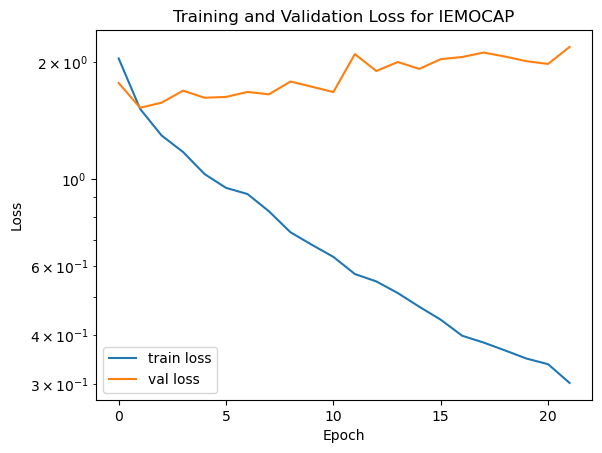

In [36]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for IEMOCAP')
plt.show()

In [37]:
print("Starting testing")
test_res, preds, accuracy, f1, recall = trainer.test()

Starting testing


2024-07-15 09:16:46,356 INFO: Test: loss: 2.1301


In [38]:
#print("Accuracy: ", accuracy)
print("F1-Score: ", f1)
print("Recall: ", recall)

F1-Score:  0.4193627160605079
Recall:  0.4237955754898552


In [39]:
print(classification_report(y_true=icp_y_test, 
                            y_pred=preds, 
                            target_names=list(emotion_mapping.keys())))

              precision    recall  f1-score   support

         neu       0.36      0.33      0.34       774
         hap       0.39      0.40      0.39       909
         sad       0.50      0.41      0.45       429
         fru       0.44      0.35      0.39      1443
         ang       0.44      0.63      0.52       981

    accuracy                           0.42      4536
   macro avg       0.43      0.42      0.42      4536
weighted avg       0.42      0.42      0.42      4536



### Train with 1-layer MLP

In [40]:
model= one_layer_MLP(6144)
print(model)

optimizer = Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

trainer = Trainer(
    model, 
    "w2v", 
    "icp", 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    icp_test_loader,
    cuda=t.cuda.is_available(), 
    early_stopping_patience=20
)

res = trainer.fit(EPOCHS)

2024-07-15 09:16:46,767 INFO: Epoch 1/100


one_layer_MLP(
  (layers): Sequential(
    (0): Linear(in_features=6144, out_features=1500, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=1500, out_features=500, bias=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=500, out_features=5, bias=True)
  )
)


2024-07-15 09:16:50,339 INFO: Train: loss: 1.5699
2024-07-15 09:16:50,888 INFO: Validation: loss: 1.5392
2024-07-15 09:16:50,892 INFO: Validation loss decreased (inf --> 1.539198). Saving model ...
2024-07-15 09:16:51,045 INFO: Epoch 2/100
2024-07-15 09:16:54,594 INFO: Train: loss: 1.4593
2024-07-15 09:16:55,149 INFO: Validation: loss: 1.4329
2024-07-15 09:16:55,154 INFO: Validation loss decreased (1.539198 --> 1.432910). Saving model ...
2024-07-15 09:16:55,297 INFO: Epoch 3/100
2024-07-15 09:16:59,002 INFO: Train: loss: 1.4177
2024-07-15 09:16:59,607 INFO: Validation: loss: 1.4294
2024-07-15 09:16:59,613 INFO: Validation loss decreased (1.432910 --> 1.429411). Saving model ...
2024-07-15 09:16:59,747 INFO: Epoch 4/100
2024-07-15 09:17:03,535 INFO: Train: loss: 1.3866
2024-07-15 09:17:04,172 INFO: Validation: loss: 1.4070
2024-07-15 09:17:04,175 INFO: Validation loss decreased (1.429411 --> 1.407016). Saving model ...
2024-07-15 09:17:04,329 INFO: Epoch 5/100
2024-07-15 09:17:07,900 I

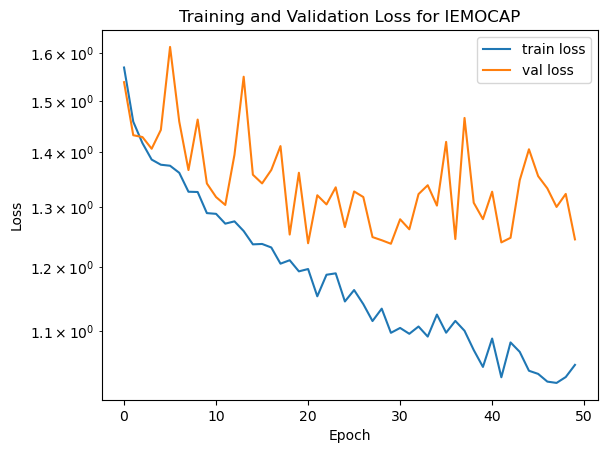

In [41]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for IEMOCAP')
plt.show()

In [42]:
print("Starting testing")
test_res, preds, accuracy, f1, recall = trainer.test()

Starting testing


2024-07-15 09:20:22,951 INFO: Test: loss: 1.3755


In [43]:
print("F1-Score: ", f1)
print("Recall: ", recall)

F1-Score:  0.42602180647102106
Recall:  0.4470106820737489


In [44]:
print(classification_report(y_true=icp_y_test, 
                            y_pred=preds, 
                            target_names=list(emotion_mapping.keys())))

              precision    recall  f1-score   support

         neu       0.40      0.44      0.42       774
         hap       0.58      0.14      0.22       909
         sad       0.57      0.52      0.54       429
         fru       0.42      0.40      0.41      1443
         ang       0.42      0.75      0.54       981

    accuracy                           0.44      4536
   macro avg       0.48      0.45      0.43      4536
weighted avg       0.46      0.44      0.41      4536



### Test on AIBO

In [45]:
# Define the directory for svg-s
results_dir = os.path.join("results")
os.makedirs(results_dir, exist_ok=True)

In [46]:
ICP_CLASS_TO_ID = {"neu": 0, "hap": 1, "sad": 2, "fru": 3, "ang": 4}
#labels_dict = {'A': 0, 'E': 1, 'N': 2, 'P': 3, 'R': 4}
ICP_ID_TO_CLASS = {v: k for k, v in ICP_CLASS_TO_ID.items()}

In [47]:
#aibo_test_loader = DataLoader(dataset=TensorDataset(t.from_numpy(aibo_X_test.values).float(),
                                               #t.from_numpy(aibo_y_test.values).long()),
                         #batch_size=BATCH_SIZE, shuffle=False)

In [48]:
model = three_layer_MLP(6144, 3000, 1000, 5)
print(model)

optimizer = Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()    # remove class weights as they vary for datasets

trainer = Trainer(
    model, 
    "w2v", 
    "icp", 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    aibo_test_loader, 
    cuda=t.cuda.is_available(), 
    early_stopping_patience=20
)

res = trainer.fit(EPOCHS)

2024-07-15 09:20:23,526 INFO: Epoch 1/100


three_layer_MLP(
  (linear_1): Linear(in_features=6144, out_features=3000, bias=True)
  (linear_1_bn): BatchNorm1d(3000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=3000, out_features=1000, bias=True)
  (linear_2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_out): Linear(in_features=1000, out_features=5, bias=True)
)


2024-07-15 09:20:34,304 INFO: Train: loss: 2.0097
2024-07-15 09:20:35,095 INFO: Validation: loss: 1.6196
2024-07-15 09:20:35,099 INFO: Validation loss decreased (inf --> 1.619585). Saving model ...
2024-07-15 09:20:35,385 INFO: Epoch 2/100
2024-07-15 09:20:46,356 INFO: Train: loss: 1.4992
2024-07-15 09:20:47,158 INFO: Validation: loss: 1.6886
2024-07-15 09:20:47,163 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:20:47,164 INFO: Epoch 3/100
2024-07-15 09:20:58,398 INFO: Train: loss: 1.3169
2024-07-15 09:20:59,207 INFO: Validation: loss: 1.6008
2024-07-15 09:20:59,210 INFO: Validation loss decreased (1.619585 --> 1.600842). Saving model ...
2024-07-15 09:20:59,527 INFO: Epoch 4/100
2024-07-15 09:21:11,248 INFO: Train: loss: 1.1656
2024-07-15 09:21:12,100 INFO: Validation: loss: 1.6380
2024-07-15 09:21:12,104 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:21:12,105 INFO: Epoch 5/100
2024-07-15 09:21:23,797 INFO: Train: loss: 1.0835
2024-07-15 09:21:24,647 INFO: Validation:

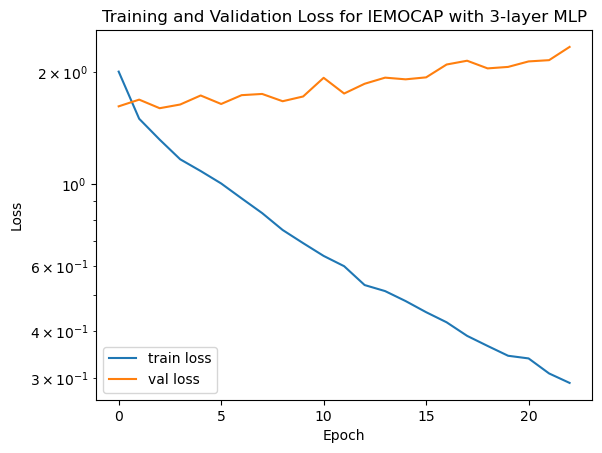

<Figure size 640x480 with 0 Axes>

In [49]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for IEMOCAP with 3-layer MLP')
plt.show()
plt.savefig('results/{}_losses.svg'.format("3-layer_MLP"))

In [50]:
print("Starting testing")
test_res, three_l_pred, accuracy, f1, recall = trainer.test()

Starting testing


2024-07-15 09:25:14,988 INFO: Test: loss: 8.3661


Performance metrics don't matter for the case of testing with AIBO as the labels are different for IEMOCAP and AIBO.

In [51]:
#print("F1-Score: ", f1)
#print("Recall: ", recall)

In [52]:
import itertools


def plot_confusion_matrix(cm, classes, title=None, normalize=True, cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    # Set values from 0 to 1
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix for {}'.format(title))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('results/conf_matrix_{}.svg'.format(title))


def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels


def display_results(y_test, pred, title):
    #pred = np.argmax(pred_probs, axis=-1)
    #one_hot_true = one_hot_encoder(y_test, len(pred), len(ICP_CLASS_TO_ID))
    #one_hot_true = one_hot_encoder(y_test, len(pred_probs), len(ICP_CLASS_TO_ID))
    acc = 'Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred))
    fscore = 'Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro'))
    prec = 'Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro'))
    rec = 'Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro'))
    metrics = [acc, fscore, prec, rec]
    cr = classification_report(y_true=y_test, 
                               y_pred=pred, 
                               target_names=list(emotion_mapping.keys()))
    cm = confusion_matrix(y_test, pred)
    f = open('results/report_{}.txt'.format(title), 'w')
    f.write('RESULTS\n\nMetrics\n\n{}\n\nClassification Report\n\n{}\n\nConfusion Matrix\n\n{}\n'.format(metrics, cr, cm))
    f.close()
    print(cr)
    plot_confusion_matrix(cm=cm, 
                          classes=list(ICP_ID_TO_CLASS.values()), 
                          title=title)

              precision    recall  f1-score   support

         neu       0.72      0.03      0.06     10967
         hap       0.07      0.63      0.13      1267
         sad       0.08      0.04      0.05       889
         fru       0.14      0.04      0.06      3601
         ang       0.09      0.34      0.14      1492

    accuracy                           0.10     18216
   macro avg       0.22      0.22      0.09     18216
weighted avg       0.48      0.10      0.07     18216

Normalized confusion matrix
[[0.03273457 0.60107596 0.02644297 0.05170056 0.28804596]
 [0.03314917 0.62746646 0.01894238 0.06708761 0.25335438]
 [0.05736783 0.67379078 0.03712036 0.10123735 0.13048369]
 [0.00999722 0.52818661 0.00888642 0.03526798 0.41766176]
 [0.00670241 0.60991957 0.01005362 0.0308311  0.3424933 ]]


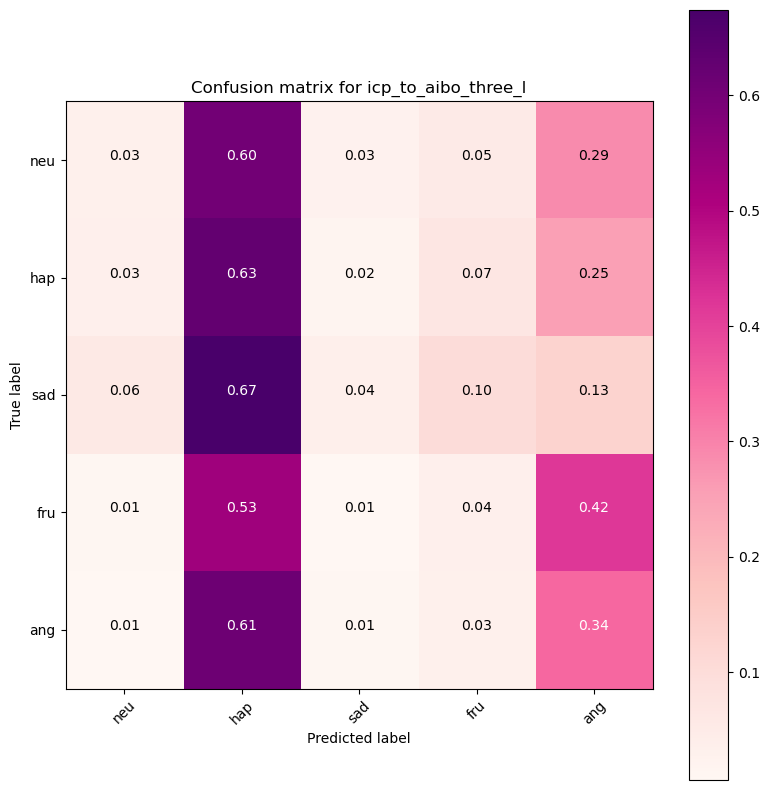

In [53]:
display_results(aibo_y_test, three_l_pred, title="icp_to_aibo_three_l")

In [54]:
model = one_layer_MLP(6144)
print(model)

optimizer = Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

trainer = Trainer(
    model, 
    "w2v", 
    "icp", 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    aibo_test_loader, 
    cuda=t.cuda.is_available(), 
    early_stopping_patience=20
)

res = trainer.fit(EPOCHS)

2024-07-15 09:25:17,177 INFO: Epoch 1/100


one_layer_MLP(
  (layers): Sequential(
    (0): Linear(in_features=6144, out_features=1500, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=1500, out_features=500, bias=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=500, out_features=5, bias=True)
  )
)


2024-07-15 09:25:20,897 INFO: Train: loss: 1.5927
2024-07-15 09:25:21,459 INFO: Validation: loss: 1.7337
2024-07-15 09:25:21,463 INFO: Validation loss decreased (inf --> 1.733743). Saving model ...
2024-07-15 09:25:21,599 INFO: Epoch 2/100
2024-07-15 09:25:25,381 INFO: Train: loss: 1.4842
2024-07-15 09:25:25,937 INFO: Validation: loss: 1.5407
2024-07-15 09:25:25,941 INFO: Validation loss decreased (1.733743 --> 1.540676). Saving model ...
2024-07-15 09:25:26,095 INFO: Epoch 3/100
2024-07-15 09:25:29,805 INFO: Train: loss: 1.4335
2024-07-15 09:25:30,362 INFO: Validation: loss: 1.4417
2024-07-15 09:25:30,367 INFO: Validation loss decreased (1.540676 --> 1.441736). Saving model ...
2024-07-15 09:25:30,499 INFO: Epoch 4/100
2024-07-15 09:25:34,276 INFO: Train: loss: 1.3964
2024-07-15 09:25:34,856 INFO: Validation: loss: 1.5964
2024-07-15 09:25:34,860 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:25:34,861 INFO: Epoch 5/100
2024-07-15 09:25:38,387 INFO: Train: loss: 1.3699
2024-07-

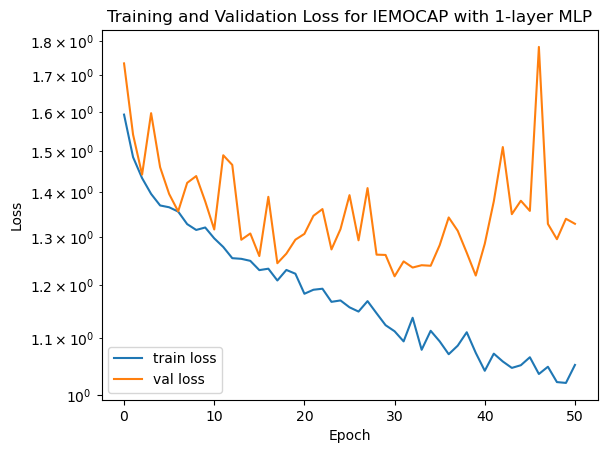

<Figure size 640x480 with 0 Axes>

In [55]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for IEMOCAP with 1-layer MLP')
plt.show()
plt.savefig('results/{}_losses.svg'.format("1-layer_MLP"))

In [56]:
print("Starting testing")
test_res, one_l_pred, accuracy, f1, recall = trainer.test()

Starting testing


2024-07-15 09:28:54,688 INFO: Test: loss: 3.2002


In [57]:
#print("F1-Score: ", f1)
#print("Recall: ", recall)

              precision    recall  f1-score   support

         neu       0.73      0.04      0.08     10967
         hap       0.08      0.54      0.13      1267
         sad       0.11      0.04      0.06       889
         fru       0.11      0.04      0.06      3601
         ang       0.08      0.38      0.14      1492

    accuracy                           0.11     18216
   macro avg       0.22      0.21      0.09     18216
weighted avg       0.48      0.11      0.08     18216

Normalized confusion matrix
[[0.04267347 0.49156561 0.02379867 0.0898149  0.35214735]
 [0.03235991 0.54222573 0.02762431 0.08050513 0.31728493]
 [0.07311586 0.53768279 0.04386952 0.13385827 0.21147357]
 [0.01194113 0.43904471 0.00555401 0.0430436  0.50041655]
 [0.01876676 0.55428954 0.00335121 0.04490617 0.37868633]]


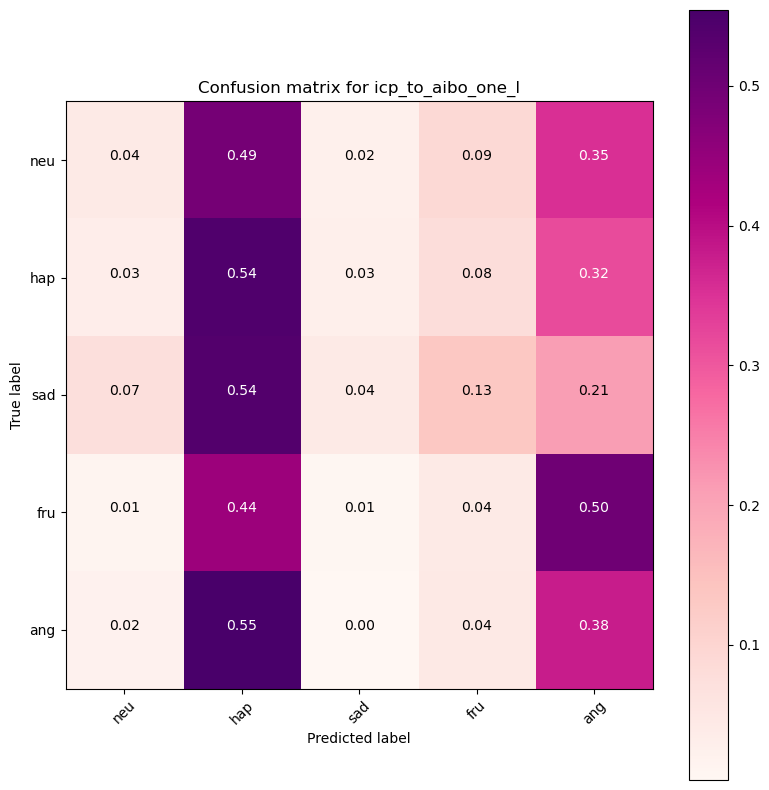

In [58]:
display_results(aibo_y_test, one_l_pred, title="icp_to_aibo_one_l")

In [59]:
np.save(os.path.join(results_dir, 'one_layer_pred.npy'), one_l_pred)
np.save(os.path.join(results_dir, 'three_layer_pred.npy'), three_l_pred)
np.save(os.path.join(results_dir, 'y_test.npy'), aibo_y_test)

print("Predictions saved successfully in:", results_dir)

Predictions saved successfully in: results


### Train with scikit-learn Models

In [60]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


(4536,)
(4536, 5)
              precision    recall  f1-score   support

         neu       0.31      0.30      0.30       774
         hap       0.29      0.30      0.29       909
         sad       0.45      0.61      0.52       429
         fru       0.40      0.19      0.26      1443
         ang       0.38      0.61      0.47       981

    accuracy                           0.36      4536
   macro avg       0.37      0.40      0.37      4536
weighted avg       0.36      0.36      0.34      4536

Normalized confusion matrix
[[0.30232558 0.22351421 0.11627907 0.14857881 0.20930233]
 [0.1320132  0.29592959 0.0660066  0.13971397 0.36633663]
 [0.15850816 0.03263403 0.61305361 0.11655012 0.07925408]
 [0.16285516 0.23215523 0.1018711  0.19334719 0.30977131]
 [0.10805301 0.13353721 0.02956167 0.12232416 0.60652396]]


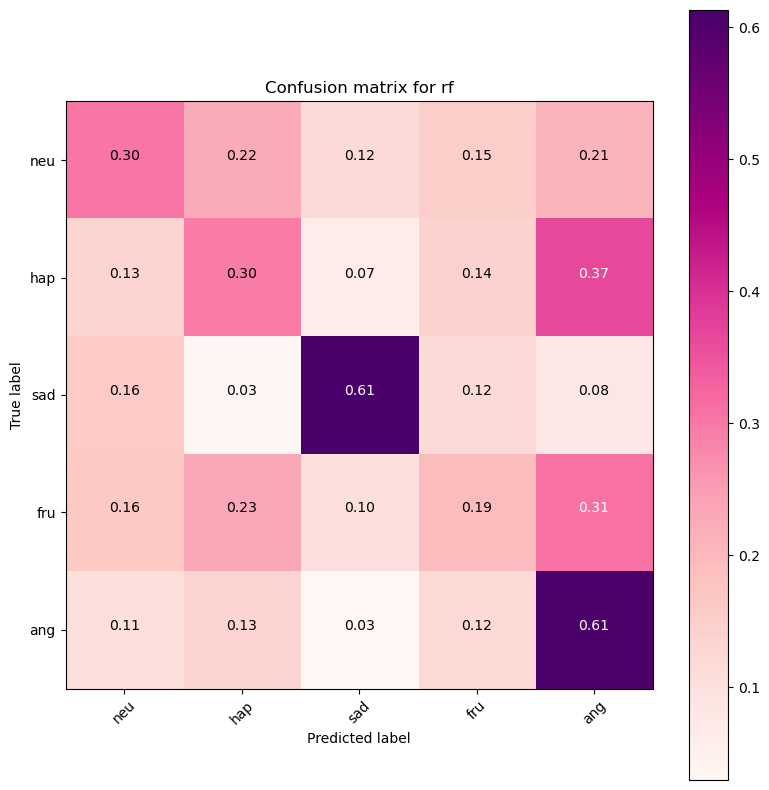

In [63]:
rf_classifier = RandomForestClassifier(n_estimators = 100,verbose=3,n_jobs=-1)
rf_classifier.fit(icp_X_train, icp_y_train)

# Predict
pred_probs = rf_classifier.predict_proba(icp_X_test)

# Results
print(icp_y_test.shape)
print(pred_probs.shape)
model = 'rf'
preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, preds, title=model)

with open('results/rf_classifier.pkl', 'wb') as f:
    pickle.dump(preds, f)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/m

              precision    recall  f1-score   support

         neu       0.00      0.00      0.00       774
         hap       0.20      1.00      0.33       909
         sad       0.00      0.00      0.00       429
         fru       0.00      0.00      0.00      1443
         ang       0.00      0.00      0.00       981

    accuracy                           0.20      4536
   macro avg       0.04      0.20      0.07      4536
weighted avg       0.04      0.20      0.07      4536

Normalized confusion matrix
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


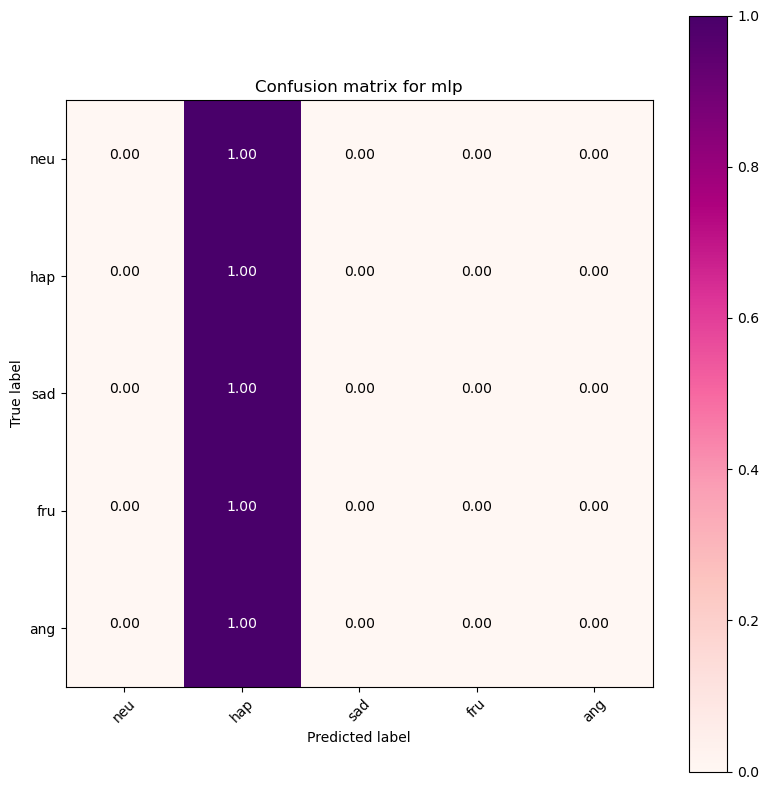

In [64]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(650, ), activation='relu', solver='adam', alpha=0.0001,
                               batch_size='auto', learning_rate='adaptive', learning_rate_init=0.01,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier.fit(icp_X_train, icp_y_train)

# Predict
pred_probs = mlp_classifier.predict_proba(icp_X_test)

# Results
model = 'mlp'
preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, preds, title=model)

with open('results/mlp_classifier.pkl', 'wb') as f:
    pickle.dump(preds, f)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

         neu       0.25      0.09      0.13       774
         hap       0.22      0.08      0.12       909
         sad       0.09      0.80      0.16       429
         fru       0.27      0.02      0.04      1443
         ang       0.23      0.01      0.02       981

    accuracy                           0.12      4536
   macro avg       0.21      0.20      0.10      4536
weighted avg       0.23      0.12      0.08      4536

Normalized confusion matrix
[[0.08656331 0.09043928 0.79457364 0.02196382 0.00645995]
 [0.04950495 0.08140814 0.8239824  0.03630363 0.00880088]
 [0.08624709 0.08391608 0.8018648  0.01864802 0.00932401]
 [0.05890506 0.06444906 0.83645184 0.02425502 0.01593902]
 [0.03975535 0.06727829 0.8440367  0.03669725 0.01223242]]


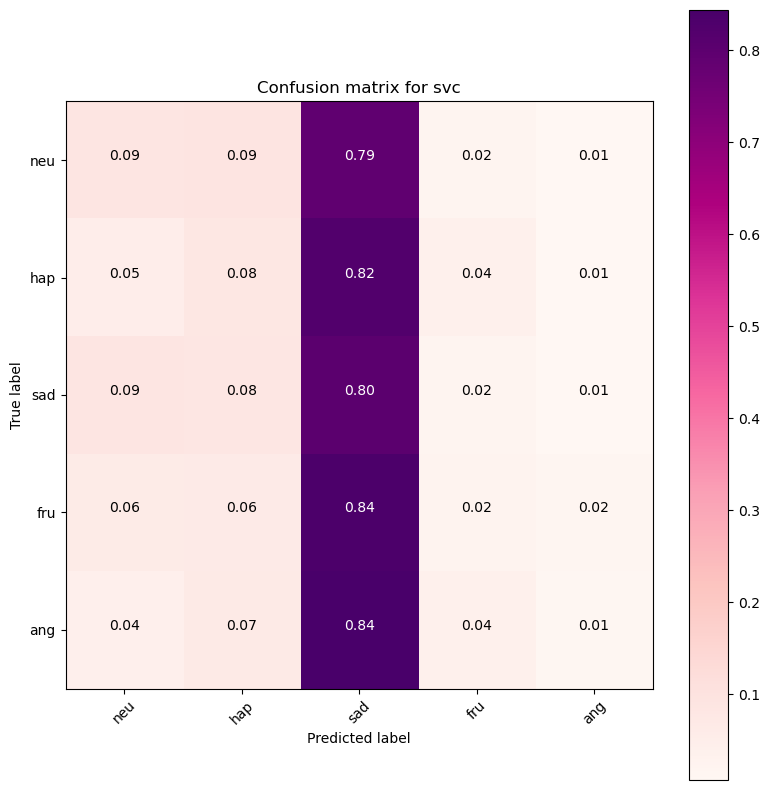

In [69]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
icp_X_train_minmax = min_max_scaler.fit_transform(icp_X_train)
svc_classifier = LinearSVC()

svc_classifier.fit(icp_X_train_minmax, icp_y_train)

# Predict
pred_probs = svc_classifier.predict(icp_X_test)

# Results
model = 'svc'
#preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, pred_probs, title=model)

with open('results/svc_classifier_model.pkl', 'wb') as f:
    pickle.dump(preds, f)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/m

              precision    recall  f1-score   support

         neu       0.00      0.00      0.00       774
         hap       0.00      0.00      0.00       909
         sad       0.09      1.00      0.17       429
         fru       0.00      0.00      0.00      1443
         ang       0.00      0.00      0.00       981

    accuracy                           0.09      4536
   macro avg       0.02      0.20      0.03      4536
weighted avg       0.01      0.09      0.02      4536

Normalized confusion matrix
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


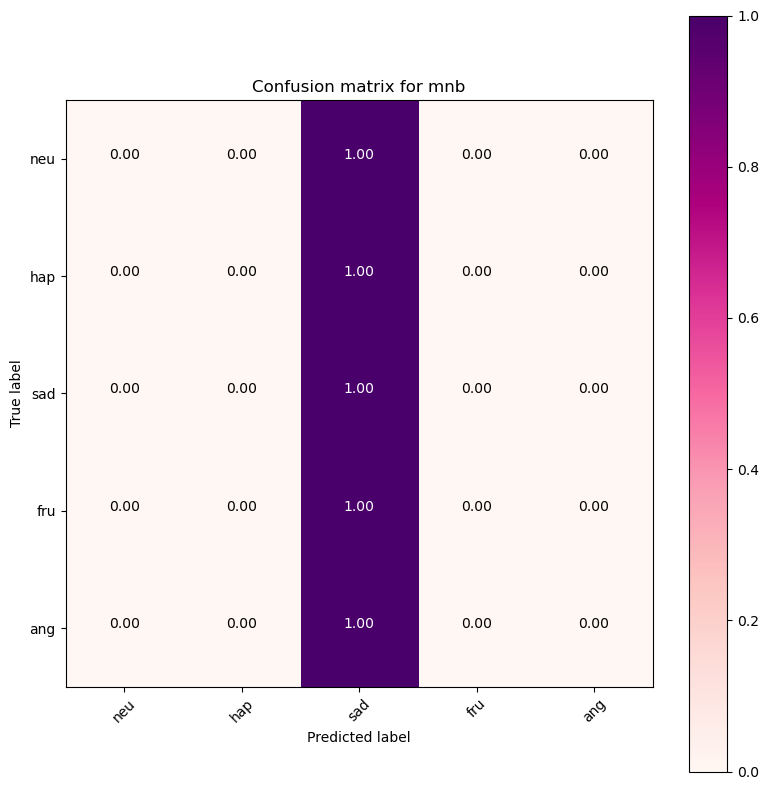

In [66]:
mnb_classifier = MultinomialNB()

mnb_classifier.fit(icp_X_train_minmax, icp_y_train)

# Predict
pred_probs = mnb_classifier.predict_proba(icp_X_test)

# Results
model = 'mnb'
preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, preds, title=model)

with open('results/mnb_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         neu       0.30      0.27      0.29       774
         hap       0.30      0.30      0.30       909
         sad       0.42      0.44      0.43       429
         fru       0.37      0.28      0.32      1443
         ang       0.36      0.51      0.42       981

    accuracy                           0.35      4536
   macro avg       0.35      0.36      0.35      4536
weighted avg       0.35      0.35      0.34      4536

Normalized confusion matrix
[[0.27131783 0.22997416 0.08139535 0.22868217 0.18863049]
 [0.12431243 0.30143014 0.06160616 0.20792079 0.30473047]
 [0.17249417 0.11888112 0.43589744 0.16783217 0.1048951 ]
 [0.14622315 0.2016632  0.07761608 0.27581428 0.2986833 ]
 [0.09174312 0.12130479 0.02650357 0.25076453 0.509684  ]]


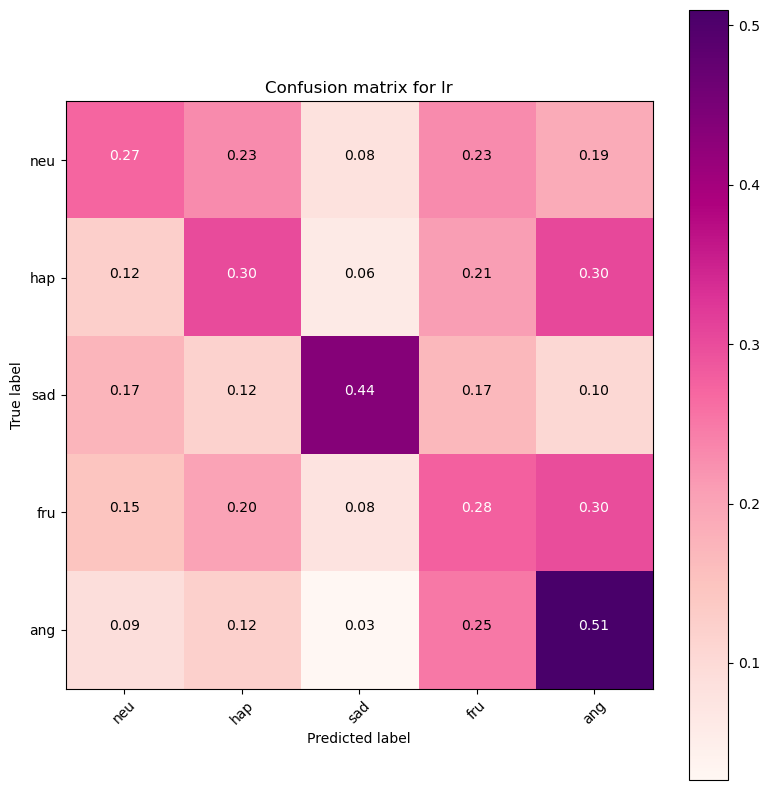

In [67]:
lr_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)

lr_classifier.fit(icp_X_train, icp_y_train)

# Predict
pred_probs = lr_classifier.predict_proba(icp_X_test)

# Results
model = 'lr'
preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, preds, title=model)

with open('results/lr_classifier.pkl', 'wb') as f:
    pickle.dump(preds, f)

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob', 
                                   n_estimators=100, sub_sample=0.8, num_class=len(ICP_CLASS_TO_ID),
                                   booster='gbtree', n_jobs=4)
xgb_classifier.fit(icp_X_train, icp_y_train)

# Predict
pred_probs = xgb_classifier.predict_proba(icp_X_test)

# Results
model = 'xgb'
preds = np.argmax(pred_probs, axis=1)
display_results(icp_y_test, preds, title=model)

with open('results/xgb_classifier.pkl', 'wb') as f:
    pickle.dump(preds, f)

[20:50:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1700181168148/work/src/learner.cc:767: 
Parameters: { "sub_sample" } are not used.



In [ ]:
ax = xgb.plot_importance(xgb_classifier, max_num_features=10, height=0.5, show_values=False)
fig = ax.figure
fig.set_size_inches(8, 8)

In [ ]:
contribution_scores = xgb_classifier.feature_importances_

top_n = [3, 5, 6, 7, 8]  # number of features
for n in top_n:
    threshold = np.argsort(contribution_scores)[::-1][:n][-1]
    print('Stats for top {} features:'.format(n))
    # Select features using threshold
    selection = SelectFromModel(xgb_classifier, threshold=contribution_scores[threshold], prefit=True)
    select_icp_X_train = selection.transform(icp_X_train)
    select_icp_X_test = selection.transform(icp_X_test)
    
    # Train
    select_xgb_classifier = xgb.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob', 
                                              n_estimators=1200, sub_sample = 0.8, num_class = len(ICP_CLASS_TO_ID),
                                              booster='gbtree', n_jobs=4)
    select_xgb_classifier.fit(select_icp_X_train, icp_y_train)

    # Predict
    pred_probs = select_xgb_classifier.predict_proba(select_icp_X_test)

    # Results
    model = 'select_xgb'
    display_results(icp_y_test, pred_probs, title=model)

### Train gender-wise

In [61]:
# Split the dataset based on gender
icp_fml_df = icp_df[icp_df.gender == 1]
icp_ml_df = icp_df[icp_df.gender == 0]

In [62]:
# Distribution of females and males in each session
icp_fml_df['session'] = icp_fml_df['filename'].str.extract(r'(Ses0\d)')[0]

fml_session_dist = icp_fml_df.groupby(['session', 'emotion']).size().unstack().fillna(0)
display(fml_session_dist)

/tmp/ipykernel_143/3980028962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icp_fml_df['session'] = icp_fml_df['filename'].str.extract(r'(Ses0\d)')[0]


emotion,0,1,2,3,4
session,,,,,
Ses01,678,351,201,432,291
Ses02,627,444,249,474,195
Ses03,468,435,441,459,264
Ses04,384,522,222,660,531
Ses05,576,708,414,624,234


In [63]:
# Distribution of females and males in each session
icp_ml_df['session'] = icp_ml_df['filename'].str.extract(r'(Ses0\d)')[0]

ml_session_dist = icp_ml_df.groupby(['session', 'emotion']).size().unstack().fillna(0)
display(ml_session_dist)

/tmp/ipykernel_143/3720708593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icp_ml_df['session'] = icp_ml_df['filename'].str.extract(r'(Ses0\d)')[0]


emotion,0,1,2,3,4
session,,,,,
Ses01,474,483,381,408,396
Ses02,459,537,342,501,216
Ses03,492,423,474,687,456
Ses04,390,387,207,783,450
Ses05,576,618,321,519,276


In [64]:
# Split the dataset based on session
fml_train_df, fml_val_df, fml_test_df = split_icp_dataset(icp_fml_df)
ml_train_df, ml_val_df, ml_test_df = split_icp_dataset(icp_ml_df)

In [65]:
# Process and balance the female train dataset
fml_icp_train_balanced_df = process_and_balance_dataset(
    fml_train_df, 
    feature_cols=[col for col in fml_train_df.columns if col not in ['gender', 'emotion']], 
    label_cols=['emotion', 'gender'], 
    groupby_cols=['gender', 'emotion']
)

# Check the distribution
print(fml_icp_train_balanced_df.groupby(['gender', 'emotion']).size())

Unique levels found: [[0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]]
Sample size determined: 789
Number of samples:  3945 Number of samples per class:  789  #classes:  5
Shape of labels_train: (3945, 2)
Good, all classes have the same number of examples
gender  emotion
1       0          789
        1          789
        2          789
        3          789
        4          789
dtype: int64


In [66]:
# Process and balance the male train dataset
ml_icp_train_balanced_df = process_and_balance_dataset(
    ml_train_df, 
    feature_cols=[col for col in ml_train_df.columns if col not in ['gender', 'emotion']], 
    label_cols=['emotion', 'gender'], 
    groupby_cols=['gender', 'emotion']
)

# Check the distribution
print(ml_icp_train_balanced_df.groupby(['gender', 'emotion']).size())

Unique levels found: [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]]
Sample size determined: 1128
Number of samples:  5640 Number of samples per class:  1128  #classes:  5
Shape of labels_train: (5640, 2)
Good, all classes have the same number of examples
gender  emotion
0       0          1128
        1          1128
        2          1128
        3          1128
        4          1128
dtype: int64


In [67]:
def prepare_data(train_df, val_df, test_df, batch_size):
    # Ensure all columns are numeric
    #icp_X_train = train_df.drop(columns=['filename', 'path', 'emotion', 'gender', 'session']).apply(pd.to_numeric, errors='coerce')
    icp_X_train = train_df.drop(columns=['filename', 'path', 'emotion', 'gender', 'session'])
    icp_y_train = train_df['emotion']
    icp_X_val = val_df.drop(columns=['filename', 'path', 'emotion', 'gender', 'session'])
    icp_y_val = val_df['emotion']
    icp_X_test = test_df.drop(columns=['filename', 'path', 'emotion', 'gender', 'session'])
    icp_y_test = test_df['emotion']
    
    # Convert the numpy arrays to torch tensors
    icp_X_train_tensor = t.from_numpy(icp_X_train.values.astype('float32'))
    icp_y_train_tensor = t.from_numpy(icp_y_train.values.astype('int64'))
    icp_X_val_tensor = t.from_numpy(icp_X_val.values.astype('float32'))
    icp_y_val_tensor = t.from_numpy(icp_y_val.values.astype('int64'))
    
    # Create TensorDataset
    train_dataset = TensorDataset(icp_X_train_tensor, icp_y_train_tensor)
    val_dataset = TensorDataset(icp_X_val_tensor, icp_y_val_tensor)
    
    # Create DataLoader
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
    
    return train_loader, val_loader, icp_y_train_tensor, icp_X_test, icp_y_test

In [68]:
# Prepare female dataset
train_loader_fml, val_loader_fml, icp_y_train_fml_tensor, icp_X_test_fml, icp_y_test_fml = prepare_data(
    fml_icp_train_balanced_df, fml_val_df, fml_test_df, 
    BATCH_SIZE)

# Prepare male dataset
train_loader_ml, val_loader_ml, icp_y_train_ml_tensor, icp_X_test_ml, icp_y_test_ml = prepare_data(
    ml_icp_train_balanced_df, ml_val_df, ml_test_df, 
    BATCH_SIZE)

In [69]:
# Compute class weights
y_train_fml_np = icp_y_train_fml_tensor.numpy()
fml_class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(y_train_fml_np), 
                                     y=y_train_fml_np)
fml_class_weights_tensor = t.tensor(fml_class_weights, dtype=t.float)

# Compute class weights
y_train_ml_np = icp_y_train_ml_tensor.numpy()
ml_class_weights = compute_class_weight('balanced', 
                                     classes=np.unique(y_train_ml_np), 
                                     y=y_train_ml_np)
ml_class_weights_tensor = t.tensor(ml_class_weights, dtype=t.float)

In [70]:
fml_model = three_layer_MLP(6144, 3000, 1000, 5)
#fml_model = one_layer_MLP(6144)
print(fml_model)

#criterion = nn.CrossEntropyLoss()
fml_criterion = nn.CrossEntropyLoss(weight=fml_class_weights_tensor,reduction='mean')

# set up the optimizer
fml_optimizer = Adam(fml_model.parameters(), lr=0.0001, weight_decay=1e-5)

fml_trainer = Trainer(fml_model, 
                      "w2v", 
                      "aibo_fml_icp", 
                      fml_criterion, 
                      fml_optimizer, 
                      train_loader_fml, 
                      val_loader_fml, 
                      aibo_test_loader, 
                  cuda=t.cuda.is_available(),\
                  early_stopping_patience=20)

# go, go, go... call fit on trainer
res = fml_trainer.fit(EPOCHS)

2024-07-15 09:28:58,367 INFO: Epoch 1/100


three_layer_MLP(
  (linear_1): Linear(in_features=6144, out_features=3000, bias=True)
  (linear_1_bn): BatchNorm1d(3000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=3000, out_features=1000, bias=True)
  (linear_2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_out): Linear(in_features=1000, out_features=5, bias=True)
)


2024-07-15 09:29:04,053 INFO: Train: loss: 2.3777
2024-07-15 09:29:04,424 INFO: Validation: loss: 1.9759
2024-07-15 09:29:04,427 INFO: Validation loss decreased (inf --> 1.975894). Saving model ...
2024-07-15 09:29:04,516 INFO: Epoch 2/100
2024-07-15 09:29:10,110 INFO: Train: loss: 1.7691
2024-07-15 09:29:10,456 INFO: Validation: loss: 1.9050
2024-07-15 09:29:10,460 INFO: Validation loss decreased (1.975894 --> 1.904968). Saving model ...
2024-07-15 09:29:10,808 INFO: Epoch 3/100
2024-07-15 09:29:16,398 INFO: Train: loss: 1.6281
2024-07-15 09:29:16,754 INFO: Validation: loss: 1.8074
2024-07-15 09:29:16,756 INFO: Validation loss decreased (1.904968 --> 1.807423). Saving model ...
2024-07-15 09:29:17,046 INFO: Epoch 4/100
2024-07-15 09:29:22,432 INFO: Train: loss: 1.4569
2024-07-15 09:29:22,774 INFO: Validation: loss: 1.8551
2024-07-15 09:29:22,776 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:29:22,777 INFO: Epoch 5/100
2024-07-15 09:29:28,242 INFO: Train: loss: 1.3848
2024-07-

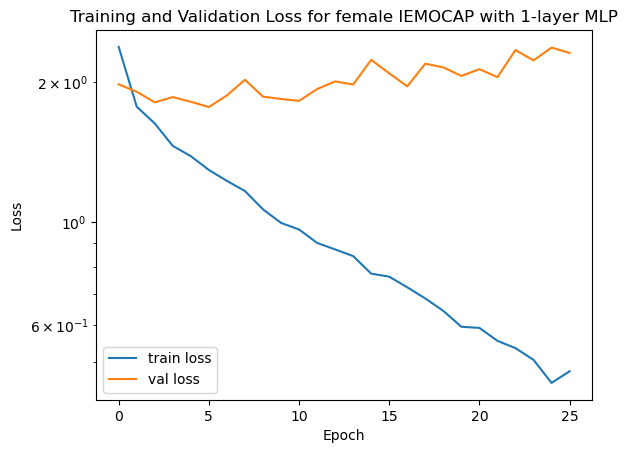

<Figure size 640x480 with 0 Axes>

In [71]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for female IEMOCAP with 1-layer MLP')
plt.show()
plt.savefig('results/{}_femaleicp_losses.svg'.format("1-layer_MLP"))

In [72]:
print("Starting testing")
test_res_fml, three_l_pred_fml, accuracy, f1, recall = fml_trainer.test()

Starting testing


2024-07-15 09:31:38,524 INFO: Test: loss: 2.8634


In [73]:
ml_model = three_layer_MLP(6144, 3000, 1000, 5)
#ml_model = one_layer_MLP(6144)
print(ml_model)

#criterion = nn.CrossEntropyLoss()
ml_criterion = nn.CrossEntropyLoss(weight=ml_class_weights_tensor,
                                   reduction='mean')

# set up the optimizer
ml_optimizer = Adam(ml_model.parameters(), lr=0.0001, weight_decay=1e-5)

ml_trainer = Trainer(ml_model, 
                      "w2v", 
                      "aibo_ml_icp", 
                      ml_criterion, 
                      ml_optimizer, 
                      train_loader_ml, 
                      val_loader_ml, 
                      aibo_test_loader, 
                  cuda=t.cuda.is_available(),\
                  early_stopping_patience=20)

# go, go, go... call fit on trainer
res = ml_trainer.fit(EPOCHS)

2024-07-15 09:31:40,733 INFO: Epoch 1/100


three_layer_MLP(
  (linear_1): Linear(in_features=6144, out_features=3000, bias=True)
  (linear_1_bn): BatchNorm1d(3000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_2): Linear(in_features=3000, out_features=1000, bias=True)
  (linear_2_bn): BatchNorm1d(1000, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (linear_out): Linear(in_features=1000, out_features=5, bias=True)
)


2024-07-15 09:31:48,810 INFO: Train: loss: 2.2979
2024-07-15 09:31:49,115 INFO: Validation: loss: 1.8056
2024-07-15 09:31:49,118 INFO: Validation loss decreased (inf --> 1.805566). Saving model ...
2024-07-15 09:31:49,213 INFO: Epoch 2/100
2024-07-15 09:31:57,179 INFO: Train: loss: 1.7877
2024-07-15 09:31:57,476 INFO: Validation: loss: 1.7293
2024-07-15 09:31:57,479 INFO: Validation loss decreased (1.805566 --> 1.729253). Saving model ...
2024-07-15 09:31:57,834 INFO: Epoch 3/100
2024-07-15 09:32:05,862 INFO: Train: loss: 1.6025
2024-07-15 09:32:06,163 INFO: Validation: loss: 1.6399
2024-07-15 09:32:06,166 INFO: Validation loss decreased (1.729253 --> 1.639891). Saving model ...
2024-07-15 09:32:06,441 INFO: Epoch 4/100
2024-07-15 09:32:14,573 INFO: Train: loss: 1.4727
2024-07-15 09:32:14,878 INFO: Validation: loss: 1.6960
2024-07-15 09:32:14,881 INFO: EarlyStopping counter: 1 out of 20
2024-07-15 09:32:14,882 INFO: Epoch 5/100
2024-07-15 09:32:22,823 INFO: Train: loss: 1.3959
2024-07-

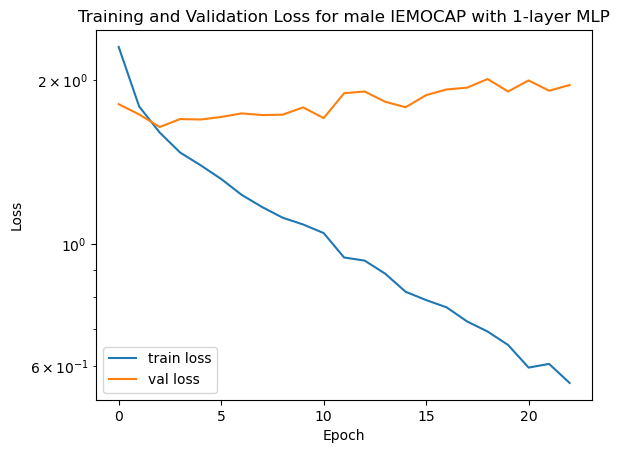

<Figure size 640x480 with 0 Axes>

In [74]:
# plot the results
plt.plot(np.arange(len(res[0])), res[0], label='train loss')
plt.plot(np.arange(len(res[1])), res[1], label='val loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss for male IEMOCAP with 1-layer MLP')
plt.show()
plt.savefig('results/{}_maleicp_losses.svg'.format("1-layer_MLP"))

In [75]:
print("Starting testing")
test_res_ml, three_l_pred_ml, accuracy, f1, recall = ml_trainer.test()

Starting testing


2024-07-15 09:34:55,658 INFO: Test: loss: 1.3994


In [76]:
np.save(os.path.join(results_dir, 'three_layer_pred_fml.npy'), three_l_pred_fml)
np.save(os.path.join(results_dir, 'three_layer_pred_ml.npy'), three_l_pred_ml)
#np.save(os.path.join(results_dir, 'three_layer_pred.npy'), three_l_pred)
np.save(os.path.join(results_dir, 'y_test.npy'), aibo_y_test)

print("Predictions saved successfully in:", results_dir)

Predictions saved successfully in: results
